In [2]:
# necessary libraries
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

from keras.models import Model, Sequential
from keras import layers

from tensorflow.keras.applications import InceptionV3


In [3]:
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

In [4]:
train_dir = "Flowers Multiclass Classification/train"
validation_dir = "Flowers Multiclass Classification/validation"
test_dir = "Flowers Multiclass Classification/test"

def prep_data(augmented,batch_size=16):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # training set
    train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(180, 180),  # The dimensions to which all images found will be resized
        seed=42,
        batch_size=batch_size,# 32  default
        class_mode="sparse") # you can change this to onehotEncoded format or another format


    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(180, 180),
        seed=42,
        batch_size=batch_size,  # 32 default
        class_mode="sparse")

    return train_set , validation_set

In [5]:
import os
import matplotlib.pyplot as plt

# Eğitim setindeki sınıf dağılımını hesapla
train_class_counts = {}
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_class_counts[class_folder] = num_images

# Doğrulama setindeki sınıf dağılımını hesapla
validation_class_counts = {}
for class_folder in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_class_counts[class_folder] = num_images

print("Training set Distribution:")
print(train_class_counts)

print("Validation set Distribution:")
print(validation_class_counts)

Training set Distribution:
{'daisy': 607, 'dandelion': 872, 'roses': 615, 'sunflowers': 673, 'tulips': 773}
Validation set Distribution:
{'daisy': 16, 'dandelion': 16, 'roses': 16, 'sunflowers': 16, 'tulips': 16}


# Percobaan 1

In [6]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.


Found 80 images belonging to 5 classes.


In [7]:
base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 2

In [10]:
Inception_1 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20


222/222 [==============================] - 111s 466ms/step - loss: 1.4099 - accuracy: 0.4542 - val_loss: 0.8053 - val_accuracy: 0.7125
Epoch 2/20
222/222 [==============================] - 96s 432ms/step - loss: 1.0362 - accuracy: 0.6076 - val_loss: 0.6902 - val_accuracy: 0.7500
Epoch 3/20
222/222 [==============================] - 92s 412ms/step - loss: 0.8845 - accuracy: 0.6684 - val_loss: 0.6150 - val_accuracy: 0.8250
Epoch 4/20
222/222 [==============================] - 92s 414ms/step - loss: 0.8193 - accuracy: 0.6935 - val_loss: 0.5267 - val_accuracy: 0.8375
Epoch 5/20
222/222 [==============================] - 155s 697ms/step - loss: 0.7589 - accuracy: 0.7282 - val_loss: 0.5042 - val_accuracy: 0.8375
Epoch 6/20
222/222 [==============================] - 98s 442ms/step - loss: 0.7125 - accuracy: 0.7367 - val_loss: 0.5828 - val_accuracy: 0.7750
Epoch 7/20
222/222 [==============================] - 98s 441ms/step - loss: 0.7078 - accuracy: 0.7458 - val_loss: 0.5721 - va

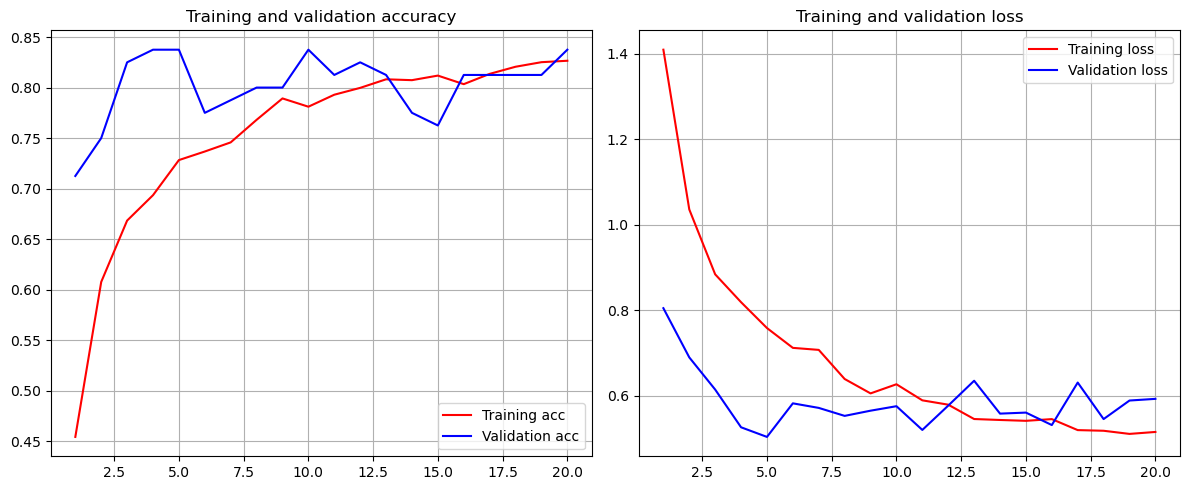

In [11]:
visualize(Inception_1)

In [12]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [13]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.


4/4 [==============================] - 3s 306ms/step
Akurasi: 74.00%
F1 Score: 72.86%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.77      1.00      0.87        10
   dandelion       1.00      0.70      0.82        10
       roses       0.80      0.40      0.53        10
  sunflowers       0.64      0.90      0.75        10
      tulips       0.64      0.70      0.67        10

    accuracy                           0.74        50
   macro avg       0.77      0.74      0.73        50
weighted avg       0.77      0.74      0.73        50



# Percobaan 2

In [14]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [15]:
base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [16]:
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [17]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                

In [18]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [19]:
Inception_2 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 129s 547ms/step - loss: 1.4566 - accuracy: 0.4452 - val_loss: 0.8380 - val_accuracy: 0.7125
Epoch 2/20
222/222 [==============================] - 148s 667ms/step - loss: 1.0326 - accuracy: 0.5989 - val_loss: 0.6288 - val_accuracy: 0.8000
Epoch 3/20
222/222 [==============================] - 188s 847ms/step - loss: 0.9043 - accuracy: 0.6585 - val_loss: 0.5739 - val_accuracy: 0.8250
Epoch 4/20
222/222 [==============================] - 168s 753ms/step - loss: 0.8193 - accuracy: 0.7008 - val_loss: 0.5326 - val_accuracy: 0.8250
Epoch 5/20
222/222 [==============================] - 161s 724ms/step - loss: 0.7658 - accuracy: 0.7294 - val_loss: 0.5317 - val_accuracy: 0.8250
Epoch 6/20
222/222 [==============================] - 189s 850ms/step - loss: 0.7318 - accuracy: 0.7271 - val_loss: 0.5700 - val_accuracy: 0.8375
Epoch 7/20
222/222 [==============================] - 169s 760ms/step - loss: 0.6822 - accuracy: 0.7602 - val_loss: 0.5874 -

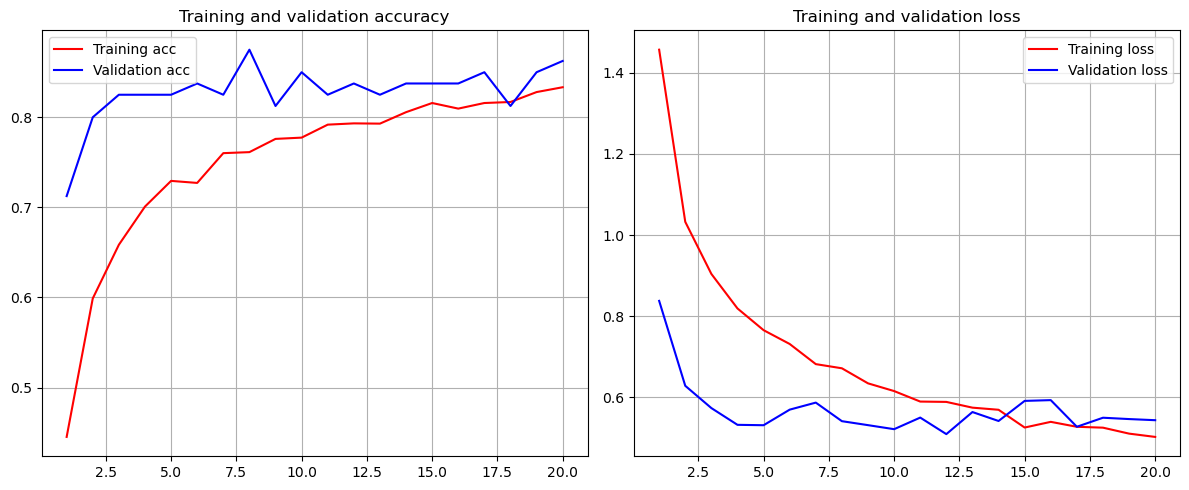

In [20]:
visualize(Inception_2)

In [21]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [22]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 12s 398ms/step
Akurasi: 76.00%
F1 Score: 74.80%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.83      1.00      0.91        10
   dandelion       0.89      0.80      0.84        10
       roses       0.57      0.40      0.47        10
  sunflowers       0.75      0.90      0.82        10
      tulips       0.70      0.70      0.70        10

    accuracy                           0.76        50
   macro avg       0.75      0.76      0.75        50
weighted avg       0.75      0.76      0.75        50



# Percobaan 3

In [23]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [24]:
base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [25]:
for layer in base_model.layers[:-15]:
    layer.trainable = False

In [26]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                

In [27]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [28]:
Inception_3 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 218s 839ms/step - loss: 1.3880 - accuracy: 0.4559 - val_loss: 0.8581 - val_accuracy: 0.6625
Epoch 2/20
222/222 [==============================] - 171s 767ms/step - loss: 1.0134 - accuracy: 0.6138 - val_loss: 0.6497 - val_accuracy: 0.7625
Epoch 3/20
222/222 [==============================] - 153s 691ms/step - loss: 0.8382 - accuracy: 0.6870 - val_loss: 0.6090 - val_accuracy: 0.8125
Epoch 4/20
222/222 [==============================] - 168s 756ms/step - loss: 0.7694 - accuracy: 0.7150 - val_loss: 0.6164 - val_accuracy: 0.8000
Epoch 5/20
222/222 [==============================] - 166s 747ms/step - loss: 0.7113 - accuracy: 0.7449 - val_loss: 0.5529 - val_accuracy: 0.8000
Epoch 6/20
222/222 [==============================] - 164s 740ms/step - loss: 0.6464 - accuracy: 0.7686 - val_loss: 0.5109 - val_accuracy: 0.8250
Epoch 7/20
222/222 [==============================] - 161s 721ms/step - loss: 0.6343 - accuracy: 0.7701 - val_loss: 0.5428 -

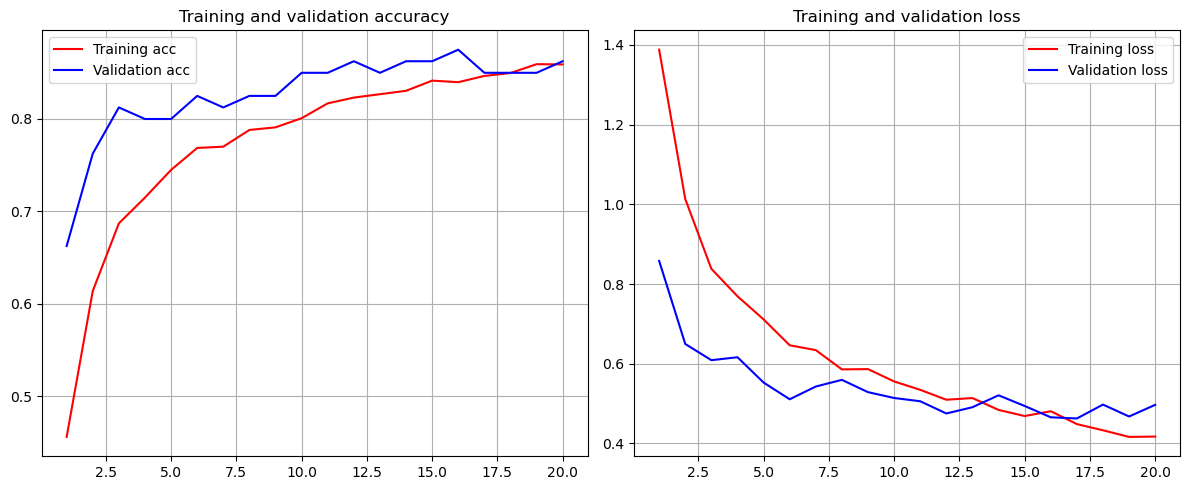

In [29]:
visualize(Inception_3)

In [30]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [31]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 6s 257ms/step
Akurasi: 76.00%
F1 Score: 75.04%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.77      1.00      0.87        10
   dandelion       1.00      0.80      0.89        10
       roses       0.67      0.40      0.50        10
  sunflowers       0.82      0.90      0.86        10
      tulips       0.58      0.70      0.64        10

    accuracy                           0.76        50
   macro avg       0.77      0.76      0.75        50
weighted avg       0.77      0.76      0.75        50



# Percobaan 4

In [32]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [33]:
base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [34]:
for layer in base_model.layers[:-20]:
    layer.trainable = False

In [35]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 5)                

In [36]:
# from keras.utils import plot_model
# plot_model(
#     model,
#     to_file='model.png',
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir='TB',
#     expand_nested=True,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=True,
#     show_trainable=True
# )

In [37]:
Inception_4= model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 121s 480ms/step - loss: 1.2842 - accuracy: 0.4791 - val_loss: 0.7121 - val_accuracy: 0.7500
Epoch 2/20
222/222 [==============================] - 100s 448ms/step - loss: 0.9182 - accuracy: 0.6514 - val_loss: 0.5767 - val_accuracy: 0.7875
Epoch 3/20
222/222 [==============================] - 96s 431ms/step - loss: 0.7947 - accuracy: 0.7051 - val_loss: 0.4824 - val_accuracy: 0.8375
Epoch 4/20
222/222 [==============================] - 104s 470ms/step - loss: 0.6962 - accuracy: 0.7559 - val_loss: 0.5358 - val_accuracy: 0.8375
Epoch 5/20
222/222 [==============================] - 117s 528ms/step - loss: 0.6723 - accuracy: 0.7551 - val_loss: 0.5283 - val_accuracy: 0.8125
Epoch 6/20
222/222 [==============================] - 116s 521ms/step - loss: 0.6063 - accuracy: 0.7822 - val_loss: 0.5382 - val_accuracy: 0.8375
Epoch 7/20
222/222 [==============================] - 115s 517ms/step - loss: 0.5788 - accuracy: 0.7955 - val_loss: 0.5291 - 

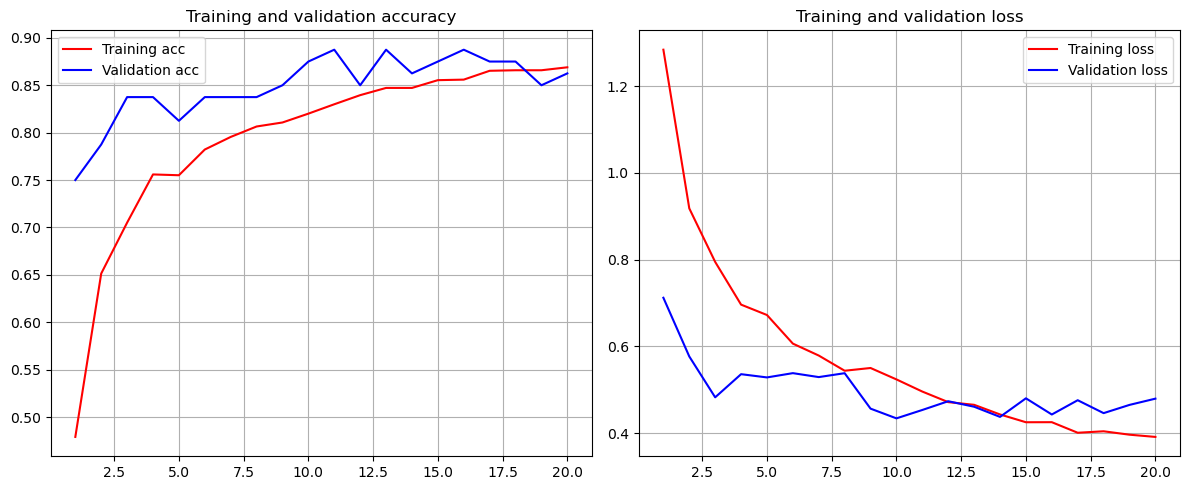

In [38]:
visualize(Inception_4)

In [39]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [40]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.


4/4 [==============================] - 6s 249ms/step
Akurasi: 82.00%
F1 Score: 81.38%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.77      1.00      0.87        10
   dandelion       1.00      0.90      0.95        10
       roses       0.83      0.50      0.62        10
  sunflowers       0.90      0.90      0.90        10
      tulips       0.67      0.80      0.73        10

    accuracy                           0.82        50
   macro avg       0.83      0.82      0.81        50
weighted avg       0.83      0.82      0.81        50



# Percobaan 5

In [41]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [42]:
base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [43]:
for layer in base_model.layers:
    layer.trainable = False

In [44]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               8388864   
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               131584    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 5)                

In [45]:
Inception_5 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 156s 622ms/step - loss: 1.7577 - accuracy: 0.3427 - val_loss: 1.0246 - val_accuracy: 0.6500
Epoch 2/20
222/222 [==============================] - 130s 583ms/step - loss: 1.3145 - accuracy: 0.4695 - val_loss: 0.8686 - val_accuracy: 0.7375
Epoch 3/20
222/222 [==============================] - 7697s 35s/step - loss: 1.1544 - accuracy: 0.5469 - val_loss: 0.7875 - val_accuracy: 0.7500
Epoch 4/20
222/222 [==============================] - 59s 264ms/step - loss: 1.0526 - accuracy: 0.5768 - val_loss: 0.7271 - val_accuracy: 0.7500
Epoch 5/20
222/222 [==============================] - 61s 274ms/step - loss: 1.0180 - accuracy: 0.5887 - val_loss: 0.7026 - val_accuracy: 0.7875
Epoch 6/20
222/222 [==============================] - 67s 301ms/step - loss: 0.9837 - accuracy: 0.6127 - val_loss: 0.6637 - val_accuracy: 0.7875
Epoch 7/20
222/222 [==============================] - 66s 298ms/step - loss: 0.8882 - accuracy: 0.6503 - val_loss: 0.6279 - val_

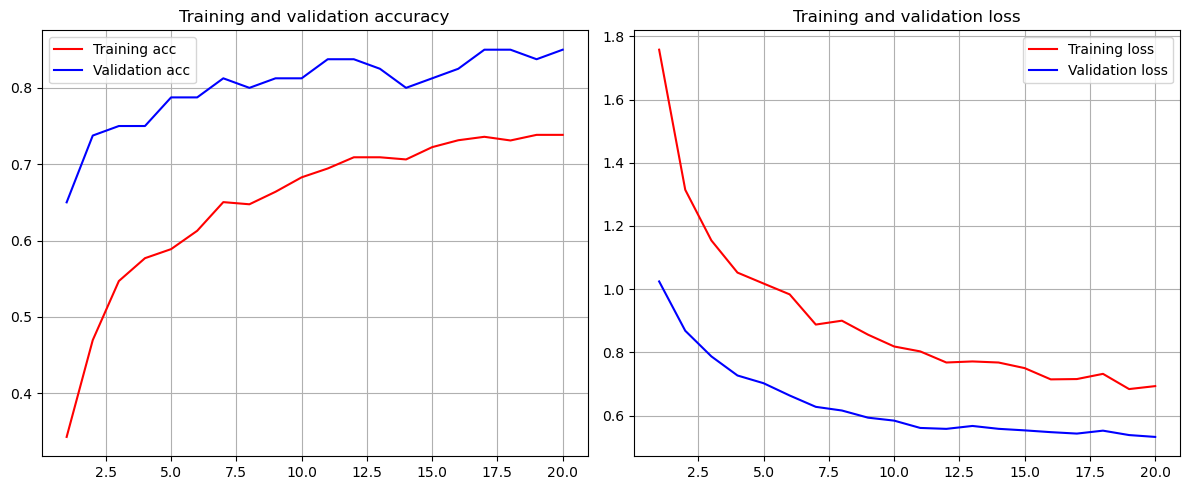

In [46]:
visualize(Inception_5)

In [47]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [48]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.
4/4 [==============================] - 2s 135ms/step
Akurasi: 74.00%
F1 Score: 73.44%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.75      0.90      0.82        10
   dandelion       0.73      0.80      0.76        10
       roses       0.83      0.50      0.62        10
  sunflowers       0.80      0.80      0.80        10
      tulips       0.64      0.70      0.67        10

    accuracy                           0.74        50
   macro avg       0.75      0.74      0.73        50
weighted avg       0.75      0.74      0.73        50



# Percobaan 6

In [49]:
train_set,validation_set=prep_data(True,batch_size=16) # with Data Augmentation

Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


In [50]:
base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [51]:
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [52]:
model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_15 (Dense)            (None, 256)               8388864   
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               131584    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 5)                

In [54]:
Inception_6 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,
    )

Epoch 1/20
222/222 [==============================] - 58s 246ms/step - loss: 1.7576 - accuracy: 0.3404 - val_loss: 1.0731 - val_accuracy: 0.6000
Epoch 2/20
222/222 [==============================] - 53s 240ms/step - loss: 1.3126 - accuracy: 0.4669 - val_loss: 0.9730 - val_accuracy: 0.5875
Epoch 3/20
222/222 [==============================] - 56s 253ms/step - loss: 1.1942 - accuracy: 0.5195 - val_loss: 0.8690 - val_accuracy: 0.6500
Epoch 4/20
222/222 [==============================] - 55s 246ms/step - loss: 1.0980 - accuracy: 0.5540 - val_loss: 0.8143 - val_accuracy: 0.6375
Epoch 5/20
222/222 [==============================] - 51s 229ms/step - loss: 1.0328 - accuracy: 0.5847 - val_loss: 0.7719 - val_accuracy: 0.6750
Epoch 6/20
222/222 [==============================] - 51s 229ms/step - loss: 0.9687 - accuracy: 0.6212 - val_loss: 0.7309 - val_accuracy: 0.6875
Epoch 7/20
222/222 [==============================] - 52s 234ms/step - loss: 0.9610 - accuracy: 0.6288 - val_loss: 0.7071 - val_ac

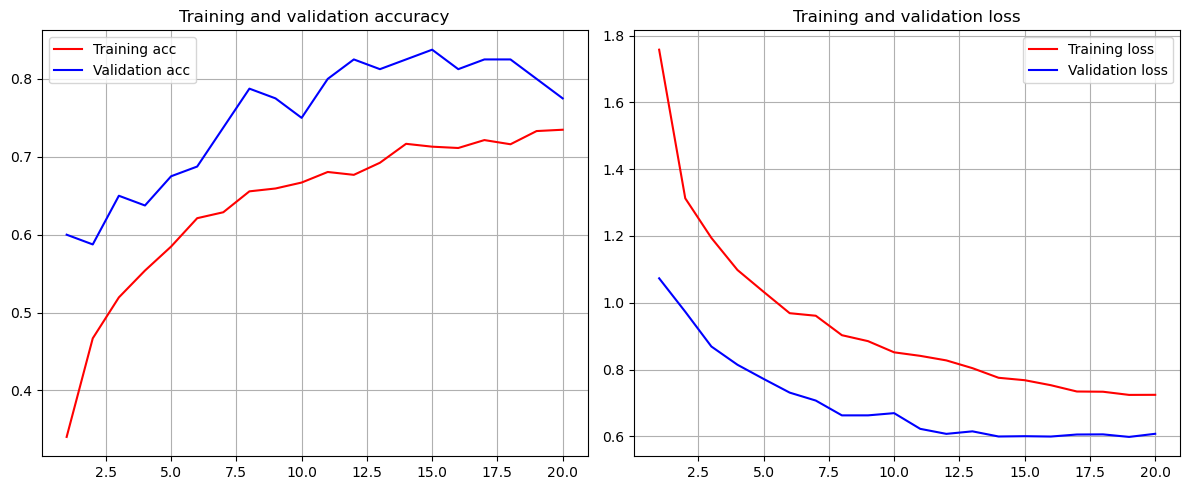

In [55]:
visualize(Inception_6)

In [56]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [57]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Menyiapkan generator data untuk dataset uji tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=16,
    class_mode="sparse",  # atau ganti dengan format lain sesuai dengan persiapan data Anda
    shuffle=False  # Tetapkan shuffle=False agar urutan hasil prediksi sesuai dengan urutan gambar
)

# Mengambil list semua kelas (sub-direktori) di direktori test
flower_classes = sorted(os.listdir(test_dir))

# Melakukan prediksi pada dataset uji
predictions = model.predict(test_set)

# Mendapatkan label sebenarnya dari generator data uji
true_labels = test_set.classes

# Mendapatkan prediksi kelas dengan nilai probabilitas tertinggi
predicted_labels = np.argmax(predictions, axis=1)

# Menghitung akurasi
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Akurasi: {accuracy * 100:.2f}%")

# Menghitung F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mencetak laporan klasifikasi (precision, recall, f1-score, support untuk setiap kelas)
class_report = classification_report(true_labels, predicted_labels, target_names=flower_classes)
print("Laporan Klasifikasi:\n", class_report)


Found 50 images belonging to 5 classes.


4/4 [==============================] - 2s 126ms/step
Akurasi: 72.00%
F1 Score: 70.95%
Laporan Klasifikasi:
               precision    recall  f1-score   support

       daisy       0.82      0.90      0.86        10
   dandelion       0.73      0.80      0.76        10
       roses       0.67      0.40      0.50        10
  sunflowers       0.73      0.80      0.76        10
      tulips       0.64      0.70      0.67        10

    accuracy                           0.72        50
   macro avg       0.72      0.72      0.71        50
weighted avg       0.72      0.72      0.71        50

